#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Análisis de Grandes Volúmenes de Datos**
###Tecnológico de Monterrey
###Prof. Iván Olmos

## **Actividad Semana 02**

###**Proyecto: Lectura, Escritura, Archivos de Big Data PySpark**

##### Nombres y matrículas de los integrantes del equipo:
*   Victoria Melgarejo Cabrera - A01795030
*   Héctor Alejandro Alvarez Rosas        - A01796262
*   Andrea Xcaret Gomez Alfaro        - A01796384
*   Mario Guillen De La Torre       - A01796701


---


#### **Descripción de la Actividad:**

Identificar una base de datos de big data para la aplicación de los conceptos aprendidos en el curso, iniciando con la manipulación básica de lectura y escritura de archivos con PySpark.



---

In [1]:
# Instalación de PySpark en Colab
!pip install pyspark

### **Importación de Librerías**

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count, percentile_approx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Matplotlib is building the font cache; this may take a moment.


### **Creación de la Sesión Spark**

In [3]:
spark = SparkSession.builder \
    .appName("ChicagoTaxyTripsAnalysis") \
    .getOrCreate()

25/05/01 18:55:16 WARN Utils: Your hostname, Hectors-MacBook-Pro-2.local resolves to a loopback address: 127.0.0.1; using 192.168.0.113 instead (on interface en0)
25/05/01 18:55:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/01 18:55:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### **Carga del Dataset**

In [4]:
from pyspark.sql import SparkSession
import os

# Ruta local del archivo (ajusta si está en otra carpeta)
filename = "Taxi_Trips__2024-__20250426-001.csv"
local_path = os.path.join(os.getcwd(), filename)

# Verifica si el archivo existe
if os.path.exists(local_path):
    print(f"Leyendo archivo desde: {local_path}")
    df = spark.read.csv(local_path, header=True, inferSchema=True)
    df.show(5)
    print(f"Total de filas: {df.count()}")
else:
    print(f"Archivo no encontrado en: {local_path}")

# Carga de archivo CSV
dftaxytrips = spark.read.csv(local_path, header=True, inferSchema=True)

Leyendo archivo desde: /Users/hectoralvarez/Downloads/Taxi_Trips__2024-__20250426-001.csv


+--------------------+--------------------+--------------------+--------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+-----+-----+-----+------+----------+------------+--------------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+--------------------------+
|             Trip ID|             Taxi ID|Trip Start Timestamp|  Trip End Timestamp|Trip Seconds|Trip Miles|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area| Fare| Tips|Tolls|Extras|Trip Total|Payment Type|             Company|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid  Location|
+--------------------+--------------------+--------------------+--------------------+------------+----------+-------------------+--------------------+------

25/05/01 18:55:29 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
                                                                                

Total de filas: 7917844


In [5]:
print("Número de registros:", dftaxytrips.count())
print("Número de columnas:", len(dftaxytrips.columns))

[Stage 8:==================>                                       (8 + 8) / 25]

Número de registros: 7917844
Número de columnas: 23


### **Exploración de los Datos**

In [6]:
# Estructura del dataset
dftaxytrips.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Taxi ID: string (nullable = true)
 |-- Trip Start Timestamp: string (nullable = true)
 |-- Trip End Timestamp: string (nullable = true)
 |-- Trip Seconds: integer (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Tips: double (nullable = true)
 |-- Tolls: double (nullable = true)
 |-- Extras: double (nullable = true)
 |-- Trip Total: double (nullable = true)
 |-- Payment Type: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid 

In [7]:
# Primeras filas
dftaxytrips.show(5)

+--------------------+--------------------+--------------------+--------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+-----+-----+-----+------+----------+------------+--------------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+--------------------------+
|             Trip ID|             Taxi ID|Trip Start Timestamp|  Trip End Timestamp|Trip Seconds|Trip Miles|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area| Fare| Tips|Tolls|Extras|Trip Total|Payment Type|             Company|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid  Location|
+--------------------+--------------------+--------------------+--------------------+------------+----------+-------------------+--------------------+------

In [10]:
dftaxytrips.summary().show()

[Stage 20:>                                                         (0 + 1) / 1]

+-------+--------------------+--------------------+--------------------+--------------------+------------------+-----------------+--------------------+--------------------+---------------------+----------------------+-----------------+------------------+--------------------+------------------+------------------+------------+--------------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+--------------------------+
|summary|             Trip ID|             Taxi ID|Trip Start Timestamp|  Trip End Timestamp|      Trip Seconds|       Trip Miles| Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|             Fare|              Tips|               Tolls|            Extras|        Trip Total|Payment Type|             Company|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid  Lo

In [11]:
# Estadísticas generales
dftaxytrips.describe().show()

[Stage 21:=====================================================>  (24 + 1) / 25]

+-------+--------------------+--------------------+--------------------+--------------------+------------------+-----------------+--------------------+--------------------+---------------------+----------------------+-----------------+------------------+--------------------+------------------+------------------+------------+--------------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+--------------------------+
|summary|             Trip ID|             Taxi ID|Trip Start Timestamp|  Trip End Timestamp|      Trip Seconds|       Trip Miles| Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|             Fare|              Tips|               Tolls|            Extras|        Trip Total|Payment Type|             Company|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid  Lo

In [12]:
# Análisis de valores faltantes en 'dftaxytrips'
missing_taxytrips = dftaxytrips.select([
    count(when(col(c).isNull() | isnan(c), c)).alias(c) #count(when(col(c).isNull(), c)).alias(c)
    for c in dftaxytrips.columns
])

print("Valores faltantes en Chicago Taxi Trips Dataset (csv):")
missing_taxytrips.show()


Valores faltantes en Chicago Taxi Trips Dataset (csv):


[Stage 24:=====================================================>  (24 + 1) / 25]

+-------+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+-----+-----+-----+------+----------+------------+-------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+--------------------------+
|Trip ID|Taxi ID|Trip Start Timestamp|Trip End Timestamp|Trip Seconds|Trip Miles|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area| Fare| Tips|Tolls|Extras|Trip Total|Payment Type|Company|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid  Location|
+-------+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+-----+-----+-----+------+----------+------------+-------+--------------

In [13]:
# Función para eliminar los valores atípicos de un DataFrame y modificarlo
def remove_outliers_inplace(df, column):
    # Calcular los percentiles Q1 y Q3 para la columna
    percentiles = df.approxQuantile(column, [0.25, 0.75], 0.05)  # 5% de error en el cálculo
    Q1 = percentiles[0]
    Q3 = percentiles[1]

    # Calcular el IQR
    IQR = Q3 - Q1

    # Definir los límites inferior y superior para los valores atípicos
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filtrar el DataFrame para eliminar los valores atípicos y modificar el DataFrame original
    df = df.filter((col(column) >= lower_limit) & (col(column) <= upper_limit))

    return df

In [14]:
# Listado de columnas numéricas
columns_to_plot = ["Trip Seconds", "Trip Miles", "Fare", "Tips", "Tolls", "Extras", "Trip Total"]

# Eliminar valores atípicos en cada columna y actualizar el DataFrame original
for column in columns_to_plot:
    dftaxytrips = remove_outliers_inplace(dftaxytrips, column)

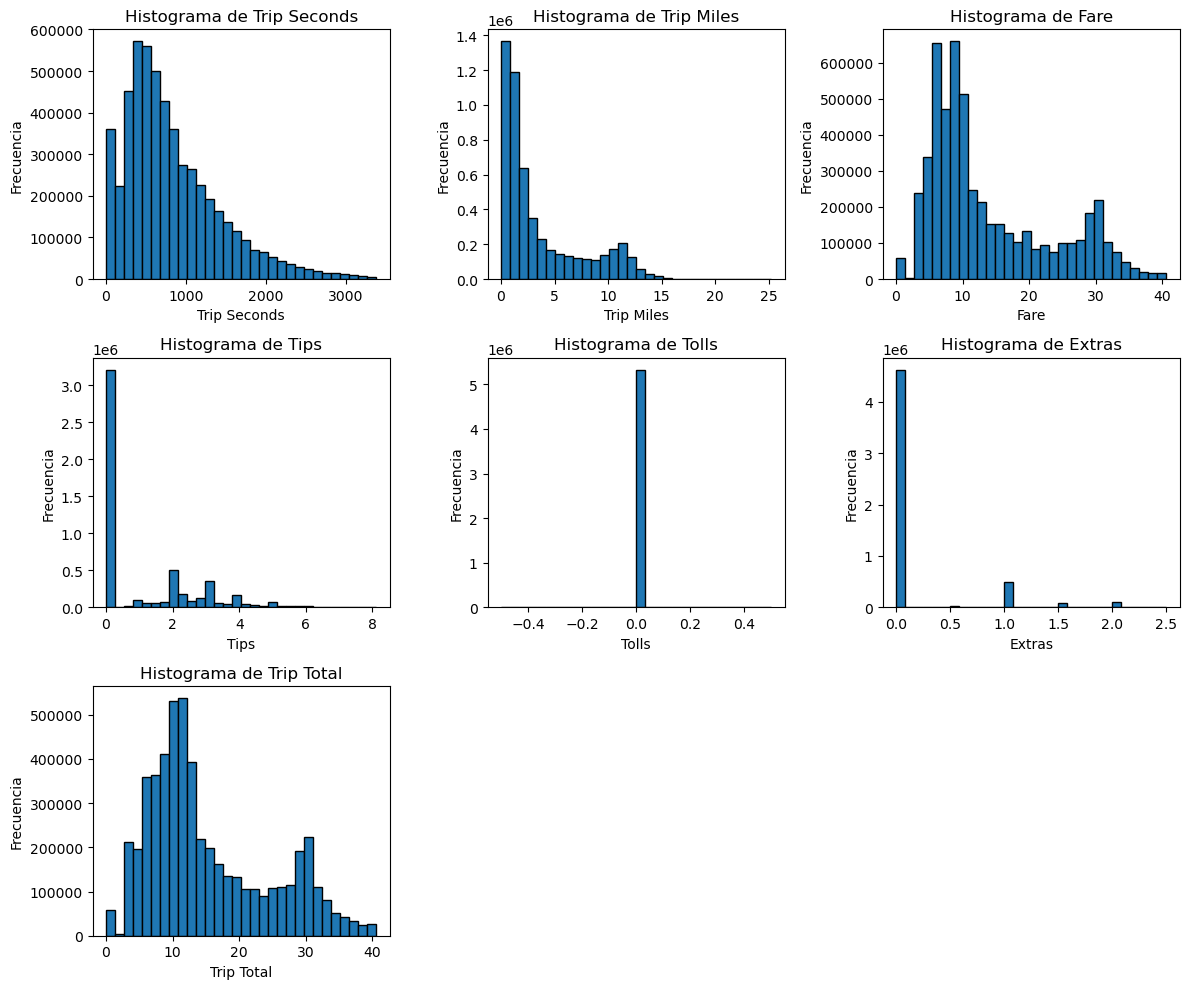

In [15]:
# Graficar histogramas directamente
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_to_plot, 1):
    # Obtener los datos de la columna después de eliminar los valores atípicos
    data = dftaxytrips.select(column).dropna().rdd.flatMap(lambda x: x).collect()

    # Graficar el histograma
    plt.subplot(3, 3, i)
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f"Histograma de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

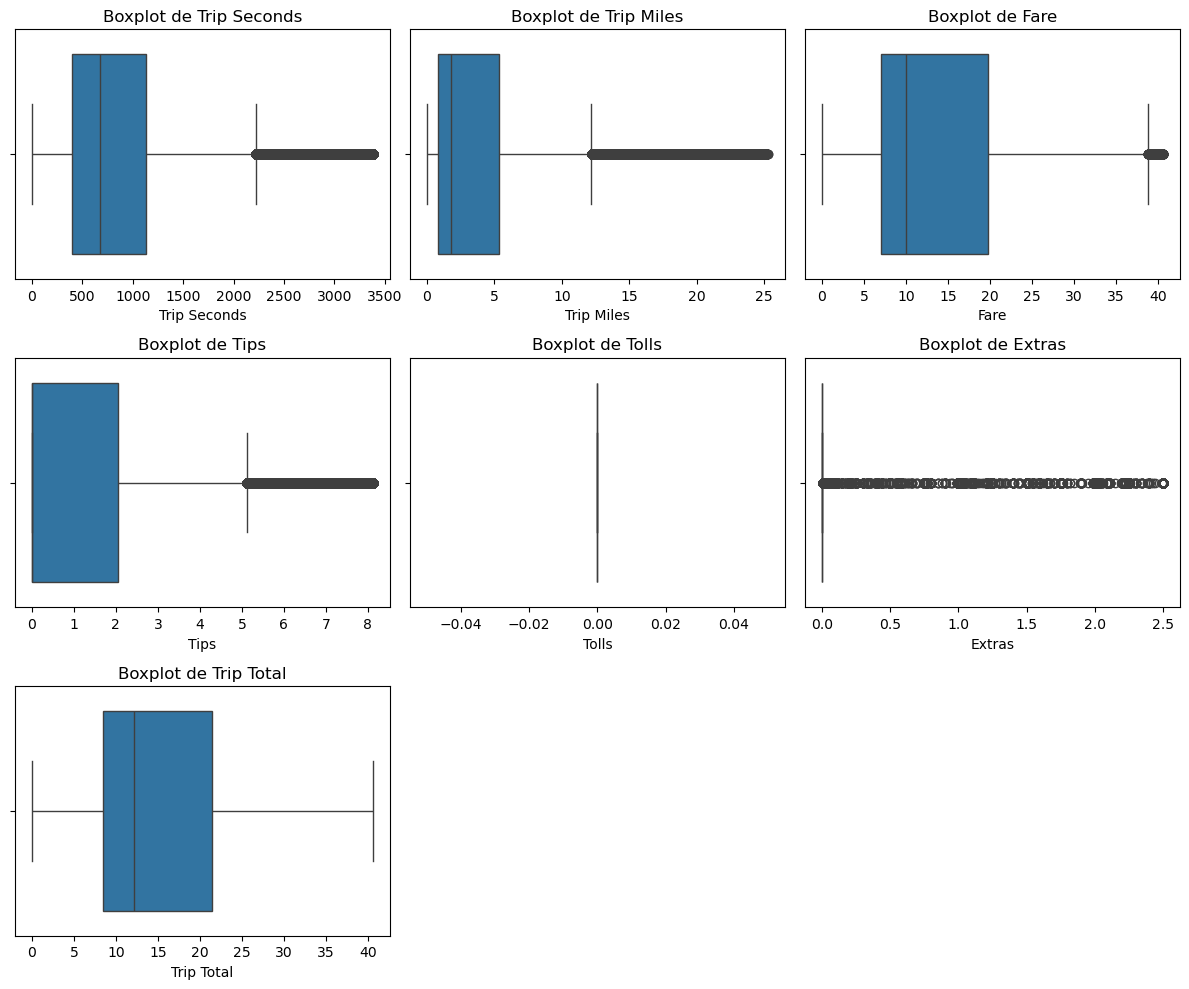

In [16]:
# Graficar los boxplots directamente
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_to_plot, 1):
    # Obtener los datos de la columna
    data = dftaxytrips.select(column).dropna().rdd.flatMap(lambda x: x).collect()

    # Graficar el boxplot
    plt.subplot(3, 3, i)
    sns.boxplot(x=data)
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [17]:
# Lista de columnas no numéricas
non_numeric_columns = ["Trip Start Timestamp", "Trip End Timestamp", "Payment Type", "Company",
                       "Pickup Centroid Location", "Dropoff Centroid  Location"]

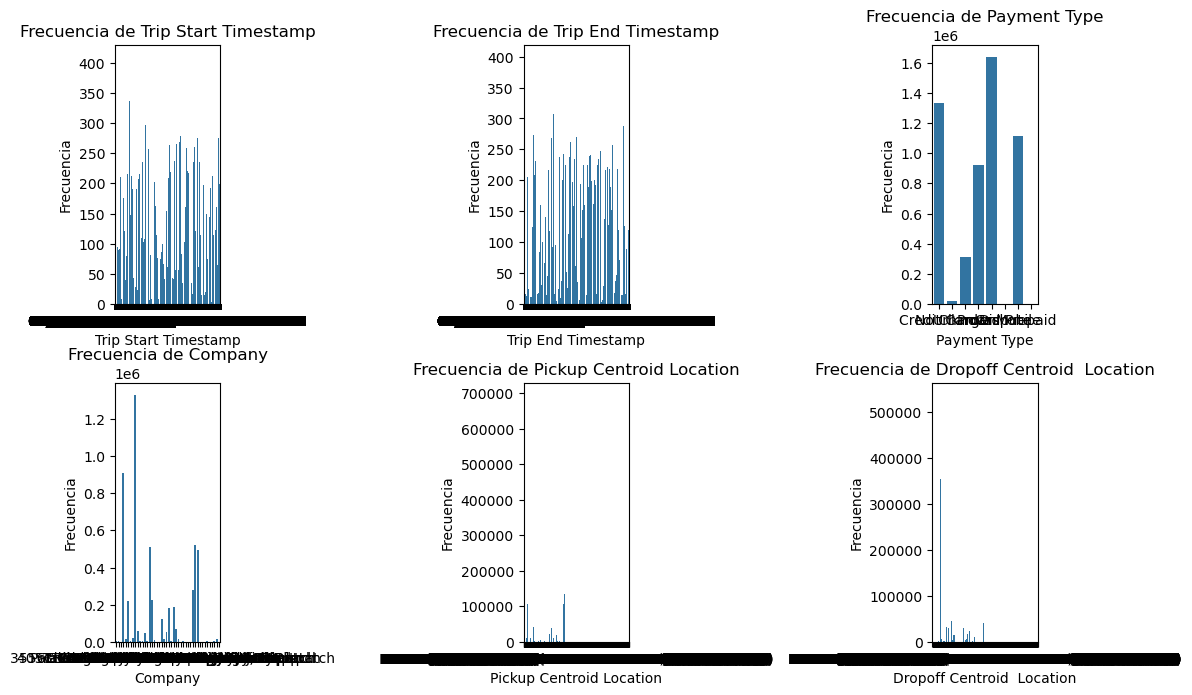

In [18]:
# Visualización de los valores de las columnas no numéricas
plt.figure(figsize=(12, 10))

for i, column in enumerate(non_numeric_columns, 1):
    plt.subplot(3, 3, i)
    # Contar las frecuencias de cada categoría
    df_filtered = dftaxytrips.select(column).dropna()  # Eliminar valores nulos
    value_counts = df_filtered.groupBy(column).count().toPandas()

    # Gráfico de barras para cada columna
    sns.barplot(x=column, y="count", data=value_counts)
    plt.title(f"Frecuencia de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [19]:
# Comprobar la cantidad de valores nulos en las columnas no numéricas
print("\nCantidad de valores nulos en las columnas no numéricas:")
for column in non_numeric_columns:
    null_count = dftaxytrips.filter(col(column).isNull()).count()
    print(f"{column}: {null_count} valores nulos")


Cantidad de valores nulos en las columnas no numéricas:


Trip Start Timestamp: 0 valores nulos


Trip End Timestamp: 0 valores nulos


Payment Type: 0 valores nulos


Company: 0 valores nulos


Pickup Centroid Location: 123623 valores nulos


[Stage 88:=====================================================>  (24 + 1) / 25]

Dropoff Centroid  Location: 203356 valores nulos
